<a href="https://colab.research.google.com/github/Amirhatamian/ML-/blob/main/04_gmm_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectation Maximization for Gaussian Mixture Model

Let’s build a dataset where points are generated from one of two one dimensional Gaussian processes. We will draw $3,000$ points from a distribution

---

with $\mu=20$ and $\sigma=5$, and $7,000$ points from a distribution with the same variance and $\mu=40$.


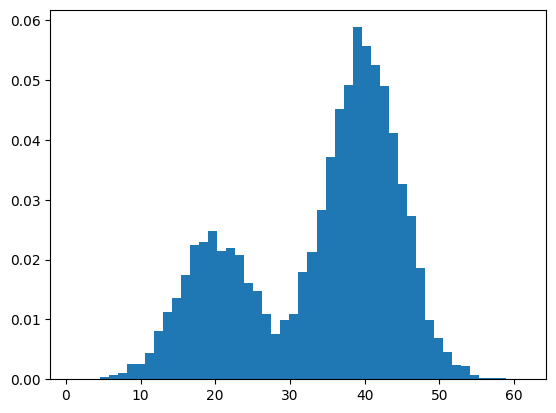

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate samples
X1 = np.random.normal(loc=20, scale=5, size=3000)
X2 = np.random.normal(loc=40, scale=5, size=7000)
X = np.hstack((X1, X2))

# Plot the histogram
plt.hist(X, bins=50, density=True)
plt.show()


We assume we already know it is a bimodal gaussian distribution with parameters $\theta=\{\mu_1,\sigma_1,\mu_2,\sigma_2\}$. We randomly initialize all of them.

*HINT: use a dictionary*

In [9]:
params = {'mu1': np.random.normal(30,10) , 'sigma1': np.random.normal(5,3),
          'mu2': np.random.normal(30,10), 'sigma2': np.random.normal(5,3) }
params0 = params

print(params)


{'mu1': 33.30868506670052, 'sigma1': 4.321083509355614, 'mu2': 47.84336958868827, 'sigma2': 6.849963088181571}


## Expectation (E-step)

For each sample point, compute the weight as the probability to belong to the first distribution with respect to the second.


In [10]:
from scipy.stats import norm

p1 = norm.pdf(X, params['mu1'], params['sigma1'])        #p(x|theta1)
p2 = norm.pdf(X, params['mu2'], params['sigma2'])        #p(x|theta2)

w1= np.divide((p1*P1), (p1*P1 + p2*P2)) #p(theta1|x)
#w2 - np.divide((p2*P2), (p1*P1 + p2*P2))#p(theta2|x)
w2 = 1-w1

NameError: ignored

## Maximization (M-step)

Find the maximum likelihood estimate of the weighted log-likelihood functions for the two distributions.

In [ ]:
import math

params['mu1'] = np.sum(w1*X) / np.sum(w1)
params['mu2'] = np.sum(w2*X) / np.sum(w2)
params['sigma1'] = math.sqrt(np.sum(w1* np.power(X-params['mu1']*np.ones(len(X)),2)) / np.sum(w1))
params['sigma2'] = math.sqrt(np.sum(w1* np.power(X-params['mu2']*np.ones(len(X)),2))) / np.sum(w2)

print(params)

## Running EM

We put now the two steps together and iterate until convergence.

In [ ]:
params = params0

Th = 0.001
P1 = 0.3
P2 = 1-P1

Lold = -1
Lnew = 0
L = np.zeros(1)
counter = 0
while (Lnew - Lold) > Th :
  print('Iteration ' + str(counter) + ':')
  counter += 1
  Lold = Lnew
  # E-step:
p1 = norm.pdf(X, params['mu1'], params['sigma1'])        #p(x|theta1)
p2 = norm.pdf(X, params['mu2'], params['sigma2'])        #p(x|theta2)
w1= np.divide((p1*P1), (p1*P1 + p2*P2)) #p(theta1|x)
w2 = 1-w1
Lnew = (p1*P1 + p2*P2) / len(X)
  # M-step:
params['mu1'] = np.sum(w1*X) / np.sum(w1)
params['mu2'] = np.sum(w2*X) / np.sum(w2)
params['sigma1'] = math.sqrt(np.sum(w1* np.power(X-params['mu1']*np.ones(len(X)),2)) / np.sum(w1))
params['sigma2'] = math.sqrt(np.sum(w1* np.power(X-params['mu2']*np.ones(len(X)),2))) / np.sum(w2)
print(params)

xs = np.linspace(0, 60, 300)
y1 = norm.pdf( xs, params['mu1'], params['sigma1'])
y2 = norm.pdf( xs, params['mu2'], params['sigma2'])

# Plot the histogram
plt.hist(X, bins=50, density=True)
plt.plot(xs, y1, 'g')
plt.plot(xs, y2, 'r')
plt.show()


Let's use now the scikit learn package


In [ ]:
from sklearn.mixture import GaussianMixture

X = X.reshape(len(X), 1)
model = GaussianMixture( n_components=2, tol=Th, init_params='kmeans')
model.fit(X)

yhat = model.predict(X)

print(model.converged_)
print(model.means_)
print(model.covariances_)

In [ ]:
from sklearn.mixture import GaussianMixture

X = X.reshape(len(X), 1)
model = GaussianMixture(n_components=2, tol=Th, init_params='kmeans')
model.fit(X)

yhat = model.predict(X)

print(model.converged_)
print(model.means_)
print(model.covariances_)

## Further readings

* Python implementation from scratch of a more complex (and general) problem: [here](https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137)
